## Modeling

In [90]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import scipy.stats as stats
import itertools
from sklearn import metrics
import pickle
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./genre_csv/all_genre_CSV')

In [7]:
df.head()

,1,3,4,5,A,A#/Bb,B,C,C#/Db,"Color_['#', '0']",...,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,valence,Minor,Major
0,0.0,0.0,1,0.0,1,0,0,0,0,0.0,...,0.558,0.556,0.000000,9,0.0869,-8.358,0.0564,0.905,0,1
1,0.0,0.0,1,0.0,0,1,0,0,0,0.0,...,0.538,0.551,0.000000,10,0.0515,-8.128,0.0802,0.963,0,1
2,0.0,0.0,1,0.0,0,0,0,0,0,0.0,...,0.505,0.192,0.000000,8,0.1060,-12.267,0.0283,0.485,0,1
3,0.0,0.0,1,0.0,1,0,0,0,0,1.0,...,0.506,0.686,0.000000,9,0.0613,-6.949,0.1180,0.834,0,1
4,0.0,0.0,1,0.0,1,0,0,0,0,0.0,...,0.554,0.677,0.000002,9,0.0840,-7.728,0.0711,0.964,0,1


## Train Test Split

In [9]:
X = df.drop(['Genre'], axis = 1)
y = df['Genre']

In [10]:
# using standard scaler to scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [11]:
df = pd.DataFrame(X, columns=X.columns)

In [13]:
# training/test
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [34]:
classes = ['50s Hits',
           'Classical',
           'detroit_techo',
           'disco',
           'electro indie pop',
           'electronic',
           'french',
           'hip hop',
           'industrial pop',
           'post rock',
           'rockabilly',
           'ska',
           'sleep',
           'spanish']

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Base Model

In [35]:
dummies_clf = DummyClassifier()
dummies_clf.fit(X_train, y_train)
preds = dummies_clf.predict(X_test)
base_confusion_matrix = confusion_matrix(y_test, preds)
base_classification_report = classification_report(y_test, preds)
print(base_confusion_matrix)
print(base_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[1 0 0 1 0 2 0 0 3 0 2 1 1 1]
 [1 0 1 0 0 1 1 5 0 4 0 2 3 4]
 [1 0 0 0 1 0 0 1 1 2 2 0 0 2]
 [0 4 0 3 2 1 1 1 0 0 2 1 4 0]
 [1 1 3 0 0 1 2 1 2 5 3 2 0 2]
 [0 2 2 0 2 1 0 3 5 1 1 0 3 0]
 [0 0 0 0 1 1 0 1 1 2 0 2 0 2]
 [1 2 1 1 1 1 0 1 3 2 0 3 0 2]
 [2 3 1 2 1 4 0 3 3 1 1 2 0 1]
 [1 2 1 0 1 1 1 1 1 0 1 1 3 2]
 [0 3 2 0 2 4 1 2 0 0 0 1 0 1]
 [2 2 0 1 1 1 1 4 0 3 0 3 3 0]
 [1 3 1 0 0 1 2 3 2 0 1 1 4 0]
 [0 0 0 0 1 0 1 3 0 1 0 1 1 0]]
                   precision    recall  f1-score   support

         50s Hits       0.09      0.08      0.09        12
        classical       0.00      0.00      0.00        22
    detroit_techo       0.00      0.00      0.00        10
            disco       0.38      0.16      0.22        19
electro indie pop       0.00      0.00      0.00        23
       electronic       0.05      0.05      0.05        20
           french       0.00      0.00      0.00        10
          hip hop       0.03      0.06      0.04        18
   industrial pop       0.14     

In [36]:
base_model_results = list(zip(list(preds), list(y_test)))
base_model_results

[('post rock', 'electro indie pop'),
 ('electro indie pop', 'ska'),
 ('hip hop', 'spanish'),
 ('sleep', 'classical'),
 ('50s Hits', 'ska'),
 ('electronic', 'electronic'),
 ('sleep', 'sleep'),
 ('hip hop', 'ska'),
 ('detroit_techo', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('post rock', 'detroit_techo'),
 ('classical', 'sleep'),
 ('ska', 'spanish'),
 ('50s Hits', 'industrial pop'),
 ('rockabilly', 'disco'),
 ('ska', 'classical'),
 ('disco', 'disco'),
 ('hip hop', 'sleep'),
 ('classical', 'post rock'),
 ('electronic', 'hip hop'),
 ('50s Hits', 'ska'),
 ('french', 'disco'),
 ('electronic', 'industrial pop'),
 ('rockabilly', 'detroit_techo'),
 ('classical', 'industrial pop'),
 ('classical', 'disco'),
 ('electronic', 'electro indie pop'),
 ('detroit_techo', 'rockabilly'),
 ('spanish', 'classical'),
 ('hip hop', 'electro indie pop'),
 ('hip hop', 'electronic'),
 ('industrial pop', '50s Hits'),
 ('ska', 'industrial pop'),
 ('french', 'electro indie pop'),
 ('ska', 'ska

Confusion Matrix, without normalization
[[1 0 0 1 0 2 0 0 3 0 2 1 1 1]
 [1 0 1 0 0 1 1 5 0 4 0 2 3 4]
 [1 0 0 0 1 0 0 1 1 2 2 0 0 2]
 [0 4 0 3 2 1 1 1 0 0 2 1 4 0]
 [1 1 3 0 0 1 2 1 2 5 3 2 0 2]
 [0 2 2 0 2 1 0 3 5 1 1 0 3 0]
 [0 0 0 0 1 1 0 1 1 2 0 2 0 2]
 [1 2 1 1 1 1 0 1 3 2 0 3 0 2]
 [2 3 1 2 1 4 0 3 3 1 1 2 0 1]
 [1 2 1 0 1 1 1 1 1 0 1 1 3 2]
 [0 3 2 0 2 4 1 2 0 0 0 1 0 1]
 [2 2 0 1 1 1 1 4 0 3 0 3 3 0]
 [1 3 1 0 0 1 2 3 2 0 1 1 4 0]
 [0 0 0 0 1 0 1 3 0 1 0 1 1 0]]


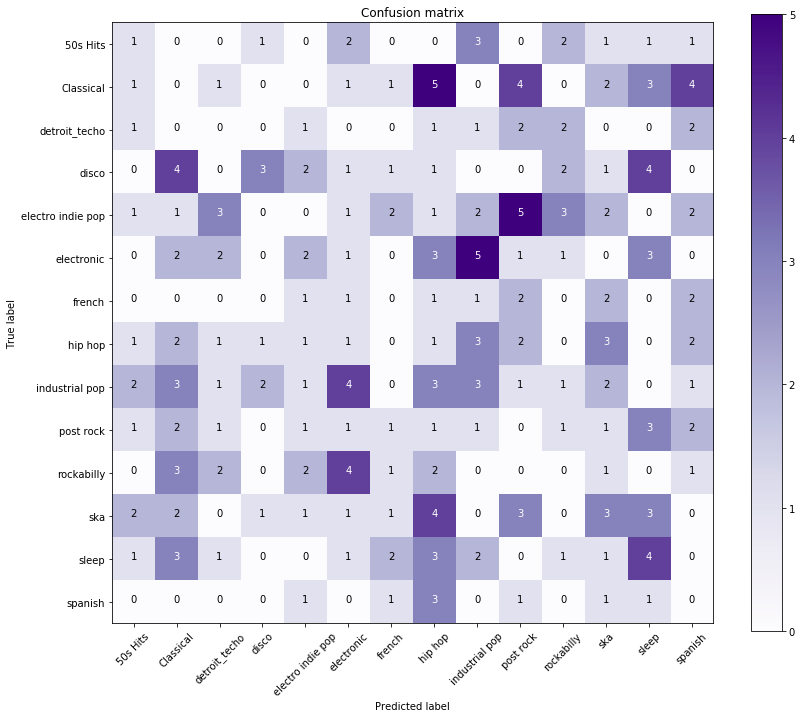

In [37]:
plot_confusion_matrix(base_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

## KNN

In [38]:
# retreiving best K value
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [39]:
# retriving best K value
find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

Best Value for k: 15
F1-Score: 0.3487394957983193


In [40]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [41]:
# retreiving metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))
    
print_metrics(y_test, preds)

Precision Score: 0.34763621214845186
Recall Score: 0.3487394957983193
Accuracy Score: 0.3487394957983193
F1 Score: 0.32769163269030016


In [42]:
KNN_confusion_matrix = confusion_matrix(y_test, preds)
KNN_classification_report = classification_report(y_test, preds)
print(KNN_confusion_matrix)
print(KNN_classification_report)

[[ 6  0  0  1  1  2  0  0  0  0  0  2  0  0]
 [ 0 13  0  0  0  0  0  0  0  2  0  0  7  0]
 [ 1  2  1  0  0  3  1  1  0  1  0  0  0  0]
 [ 1  0  1  9  0  0  2  2  1  1  0  2  0  0]
 [ 1  0  0  1 11  2  0  2  2  1  1  0  0  2]
 [ 3  2  0  2  2  8  0  1  0  2  0  0  0  0]
 [ 2  2  0  3  0  2  0  0  1  0  0  0  0  0]
 [ 3  0  1  0  3  0  0  5  2  0  0  2  0  2]
 [ 0  0  0  3  5  3  1  3  4  1  0  1  0  3]
 [ 2  1  0  2  0  6  0  2  1  2  0  0  0  0]
 [ 3  0  0  1  2  0  1  1  1  1  1  4  0  1]
 [ 3  0  0  1  4  0  0  1  3  0  0  6  0  3]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  2  1  0  0  1  0  0  1  0  3]]
                   precision    recall  f1-score   support

         50s Hits       0.24      0.50      0.32        12
        classical       0.52      0.59      0.55        22
    detroit_techo       0.33      0.10      0.15        10
            disco       0.39      0.47      0.43        19
electro indie pop       0.37      0.48      0.42        23
       electro

In [43]:
KNN_results = list(zip(list(preds), list(y_test)))
KNN_results

[('electronic', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('spanish', 'ska'),
 ('electronic', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('french', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('spanish', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('50s Hits', 'hip hop'),
 ('ska', 'ska'),
 ('post rock', 'disco'),
 ('disco', 'industrial pop'),
 ('electronic', 'detroit_techo'),
 ('industrial pop', 'industrial pop'),
 ('disco', 'disco'),
 ('electro indie pop', 'electro indie pop'),
 ('hip hop', 'rockabilly'),
 ('classical', 'classical'),
 ('electronic', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('electronic', '50s Hits'),
 ('electro indie pop', 'industrial pop'),
 ('industrial pop', 'electro indie pop'),
 ('el

Confusion Matrix, without normalization
[[ 6  0  0  1  1  2  0  0  0  0  0  2  0  0]
 [ 0 13  0  0  0  0  0  0  0  2  0  0  7  0]
 [ 1  2  1  0  0  3  1  1  0  1  0  0  0  0]
 [ 1  0  1  9  0  0  2  2  1  1  0  2  0  0]
 [ 1  0  0  1 11  2  0  2  2  1  1  0  0  2]
 [ 3  2  0  2  2  8  0  1  0  2  0  0  0  0]
 [ 2  2  0  3  0  2  0  0  1  0  0  0  0  0]
 [ 3  0  1  0  3  0  0  5  2  0  0  2  0  2]
 [ 0  0  0  3  5  3  1  3  4  1  0  1  0  3]
 [ 2  1  0  2  0  6  0  2  1  2  0  0  0  0]
 [ 3  0  0  1  2  0  1  1  1  1  1  4  0  1]
 [ 3  0  0  1  4  0  0  1  3  0  0  6  0  3]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  2  1  0  0  1  0  0  1  0  3]]


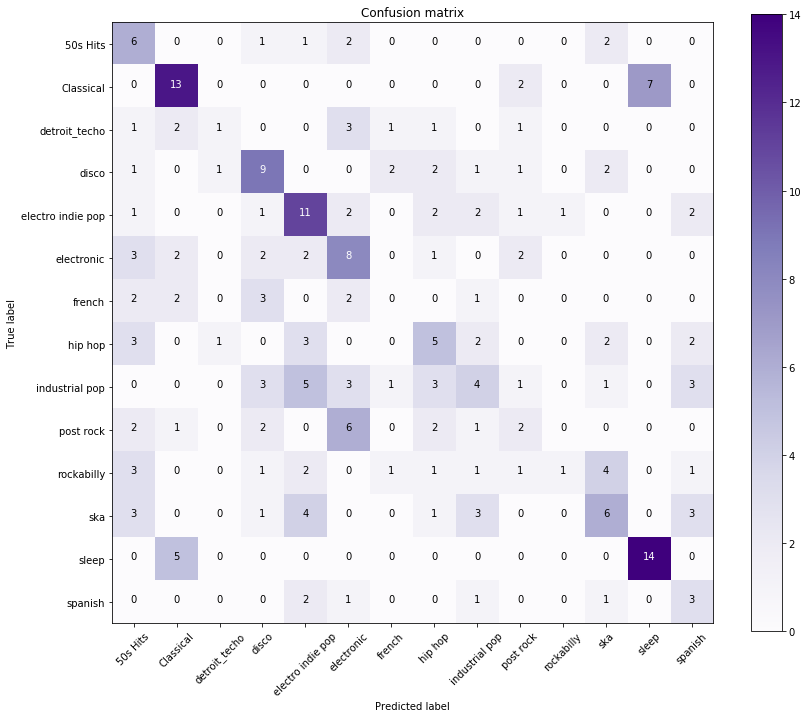

In [44]:
plot_confusion_matrix(KNN_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [74]:
# saving first KNN model
filename = './models/KNN_model_1.sav'
pickle.dump(knn, open(filename, 'wb'))

## Random Forest
### Model 1

In [62]:
forest = RandomForestClassifier(n_estimators=300, max_depth= 60)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
Random_Forest_score = forest.score(X_test, y_test)
Random_Forest_score

0.592436974789916

In [71]:
print_metrics(y_test, preds)

Precision Score: 0.5973866876650302
Recall Score: 0.592436974789916
Accuracy Score: 0.592436974789916
F1 Score: 0.5789591525423934


In [64]:
preds = forest.predict(X_test)
random_forest_confusion_matrix = confusion_matrix(y_test, preds)
random_forest_classification_report = classification_report(y_test, preds)
print(random_forest_confusion_matrix)
print(random_forest_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[10  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  5  1  0  2  0  0  2  0  0  0  0  0]
 [ 1  0  1 11  1  0  0  1  1  0  0  2  0  1]
 [ 0  0  0  2 11  0  0  5  1  0  0  1  0  3]
 [ 0  0  1  0  1  9  0  0  2  7  0  0  0  0]
 [ 3  2  0  0  0  0  2  0  0  0  1  2  0  0]
 [ 1  0  0  0  0  0  0 13  1  0  0  1  0  2]
 [ 0  0  0  0  4  1  2  1 12  1  0  3  0  0]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 3  0  0  2  0  0  0  0  2  0  3  6  0  0]
 [ 1  0  0  2  1  0  1  0  2  0  0 13  0  1]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  1  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.53      0.83      0.65        12
        classical       0.76      0.86      0.81        22
    detroit_techo       0.71      0.50      0.59        10
            disco       0.58      0.58      0.58        19
electro indie pop       0.55      0.48      0.51        23
       electro

In [66]:
random_forest_results = list(zip(list(preds), list(y_test)))
random_forest_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('spanish', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('ska', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('hip hop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('industrial pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('industrial pop', 'industrial pop'),
 ('ska', 'disco'),
 ('industrial pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('50s Hits', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('electro indie pop', 'electro indie pop'),
 ('ska'

Confusion Matrix, without normalization
[[10  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  5  1  0  2  0  0  2  0  0  0  0  0]
 [ 1  0  1 11  1  0  0  1  1  0  0  2  0  1]
 [ 0  0  0  2 11  0  0  5  1  0  0  1  0  3]
 [ 0  0  1  0  1  9  0  0  2  7  0  0  0  0]
 [ 3  2  0  0  0  0  2  0  0  0  1  2  0  0]
 [ 1  0  0  0  0  0  0 13  1  0  0  1  0  2]
 [ 0  0  0  0  4  1  2  1 12  1  0  3  0  0]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 3  0  0  2  0  0  0  0  2  0  3  6  0  0]
 [ 1  0  0  2  1  0  1  0  2  0  0 13  0  1]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  1  0  4]]


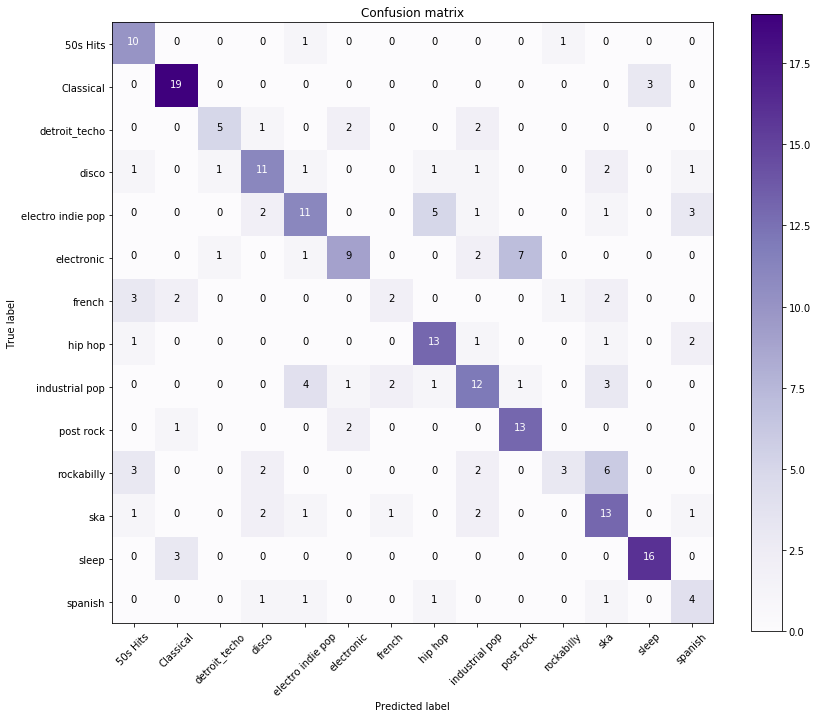

In [65]:
plot_confusion_matrix(random_forest_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [67]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='purple') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

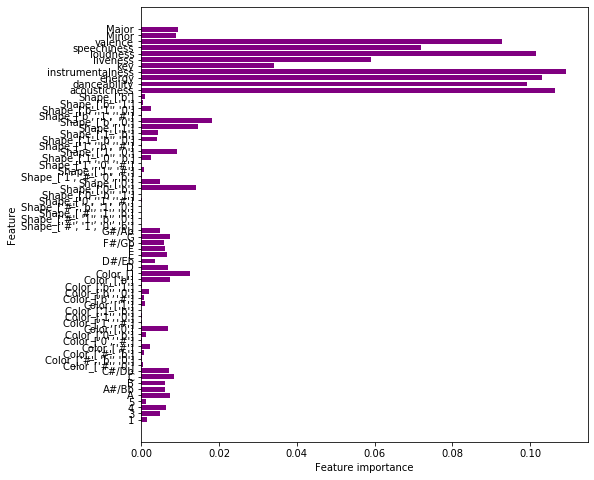

In [68]:
plot_feature_importances(forest)

In [75]:
filename = './models/Random_Forest_model_1.sav'
pickle.dump(forest, open(filename, 'wb'))

### GridSearch for Random Forest

In [128]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=10))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 60.67%


In [129]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 60.03%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


### Model 2

In [130]:
forest = RandomForestClassifier(criterion= 'entropy', 
                                n_estimators= 100, 
                                max_depth= 60,
                                min_samples_leaf = 3
                                )
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
Random_Forest_score = forest.score(X_test, y_test)
Random_Forest_score

0.5756302521008403

In [132]:
print_metrics(y_test, preds)

Precision Score: 0.5719284529937027
Recall Score: 0.5672268907563025
Accuracy Score: 0.5672268907563025
F1 Score: 0.5576527101938331


In [133]:
preds = forest.predict(X_test)
random_forest_confusion_matrix = confusion_matrix(y_test, preds)
random_forest_classification_report = classification_report(y_test, preds)
print(random_forest_confusion_matrix)
print(random_forest_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[10  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  4  1  1  4  0  0  0  0  0  0  0  0]
 [ 1  0  1 11  1  0  0  1  0  0  0  2  0  2]
 [ 0  0  0  3 10  1  0  4  2  0  0  0  0  3]
 [ 0  1  1  0  1  7  0  0  2  8  0  0  0  0]
 [ 3  2  0  0  0  0  2  0  0  0  1  2  0  0]
 [ 0  0  0  1  0  0  0 11  2  0  0  1  0  3]
 [ 0  0  0  1  2  1  2  2 13  1  0  2  0  0]
 [ 0  0  0  0  0  2  0  0  0 14  0  0  0  0]
 [ 3  0  0  1  0  0  0  0  2  0  2  8  0  0]
 [ 1  0  0  1  1  0  1  1  3  0  0 12  0  1]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  1  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.56      0.83      0.67        12
        classical       0.78      0.95      0.86        22
    detroit_techo       0.67      0.40      0.50        10
            disco       0.55      0.58      0.56        19
electro indie pop       0.56      0.43      0.49        23
       electro

In [134]:
random_forest_results = list(zip(list(preds), list(y_test)))
random_forest_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('ska', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('hip hop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('hip hop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('electro indie pop', 'industrial pop'),
 ('ska', 'disco'),
 ('industrial pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electronic', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('50s Hits', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('electro indie pop', 'electro indie pop'),
 

Confusion Matrix, without normalization
[[10  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  4  1  1  4  0  0  0  0  0  0  0  0]
 [ 1  0  1 11  1  0  0  1  0  0  0  2  0  2]
 [ 0  0  0  3 10  1  0  4  2  0  0  0  0  3]
 [ 0  1  1  0  1  7  0  0  2  8  0  0  0  0]
 [ 3  2  0  0  0  0  2  0  0  0  1  2  0  0]
 [ 0  0  0  1  0  0  0 11  2  0  0  1  0  3]
 [ 0  0  0  1  2  1  2  2 13  1  0  2  0  0]
 [ 0  0  0  0  0  2  0  0  0 14  0  0  0  0]
 [ 3  0  0  1  0  0  0  0  2  0  2  8  0  0]
 [ 1  0  0  1  1  0  1  1  3  0  0 12  0  1]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  1  0  4]]


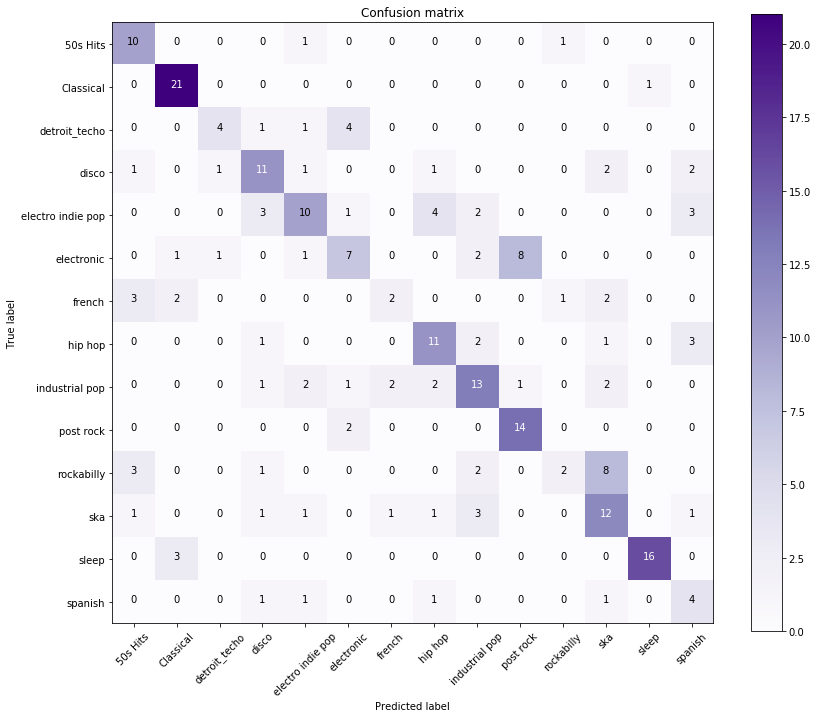

In [135]:
plot_confusion_matrix(random_forest_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [136]:
filename = './models/Random_Forest_model_2.sav'
pickle.dump(forest, open(filename, 'wb'))

## Support Vector Machine


In [114]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.108 (+/-0.042) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.074 (+/-0.054) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.326 (+/-0.064) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.116 (+/-0.058) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.508 (+/-0.064) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.326 (+/-0.067) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.546 (+/-0.073) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.531 (+/-0.081) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.532 (+/-0.109) for {'C': 1, 'kernel': 'linear'}
0.555 (+/-0.074) for {'C': 10, 'kernel': 'linear'}
0.522 (+/-0.077) for {'C': 100, 'kernel': 'linear'}
0.519 (+/-0.077) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full ev

### First SVC Model

In [137]:
tic = time()
svclassifier = SVC(kernel='rbf', C=1.906667, degree = 6)  
svclassifier.fit(X_train, y_train) 
preds = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.1740741729736328 seconds


In [138]:
SVC_score = svclassifier.score(X_test, y_test)
SVC_score

0.3319327731092437

In [139]:
print_metrics(y_test, preds)

Precision Score: 0.33118929620745685
Recall Score: 0.3319327731092437
Accuracy Score: 0.3319327731092437
F1 Score: 0.3000767989447497


In [140]:
SVC_confusion_matrix = confusion_matrix(y_test,preds)
SVC_classification_report = classification_report(y_test,preds)
print(SVC_confusion_matrix)
print(SVC_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[ 6  1  0  0  0  1  0  1  0  0  0  3  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 1  1  1  0  0  4  0  0  1  2  0  0  0  0]
 [ 0  0  0  1  3  5  0  3  2  1  0  3  0  1]
 [ 1  0  0  0  6  2  0  7  0  2  0  1  0  4]
 [ 0  2  0  0  1  9  0  2  1  5  0  0  0  0]
 [ 1  2  0  1  0  3  0  0  0  1  0  2  0  0]
 [ 0  0  0  1  0  1  0  5  1  0  0  7  0  3]
 [ 0  0  0  1  3  5  0  4  4  0  0  2  0  5]
 [ 0  1  0  0  0  7  0  1  1  6  0  0  0  0]
 [ 3  0  0  1  1  2  0  2  0  0  0  6  0  1]
 [ 1  0  0  0  5  0  0  1  1  0  0 10  0  3]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  2  1  0  1  0  0  0  0  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.46      0.50      0.48        12
        classical       0.52      0.59      0.55        22
    detroit_techo       1.00      0.10      0.18        10
            disco       0.20      0.05      0.08        19
electro indie pop       0.29      0.26      0.27        23
       electro

In [141]:
svc_results = list(zip(list(preds), list(y_test)))
svc_results

[('hip hop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('spanish', 'ska'),
 ('electronic', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('post rock', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('spanish', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('electronic', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('hip hop', 'hip hop'),
 ('ska', 'ska'),
 ('electronic', 'disco'),
 ('disco', 'industrial pop'),
 ('electronic', 'detroit_techo'),
 ('hip hop', 'industrial pop'),
 ('electro indie pop', 'disco'),
 ('hip hop', 'electro indie pop'),
 ('ska', 'rockabilly'),
 ('classical', 'classical'),
 ('post rock', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('electronic', '50s Hits'),
 ('spanish', 'industrial pop'),
 ('hip hop', 'electro indie pop'),
 ('electro indie pop', 'ska'),
 ('

Confusion Matrix, without normalization
[[ 6  1  0  0  0  1  0  1  0  0  0  3  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 1  1  1  0  0  4  0  0  1  2  0  0  0  0]
 [ 0  0  0  1  3  5  0  3  2  1  0  3  0  1]
 [ 1  0  0  0  6  2  0  7  0  2  0  1  0  4]
 [ 0  2  0  0  1  9  0  2  1  5  0  0  0  0]
 [ 1  2  0  1  0  3  0  0  0  1  0  2  0  0]
 [ 0  0  0  1  0  1  0  5  1  0  0  7  0  3]
 [ 0  0  0  1  3  5  0  4  4  0  0  2  0  5]
 [ 0  1  0  0  0  7  0  1  1  6  0  0  0  0]
 [ 3  0  0  1  1  2  0  2  0  0  0  6  0  1]
 [ 1  0  0  0  5  0  0  1  1  0  0 10  0  3]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  2  1  0  1  0  0  0  0  0  4]]


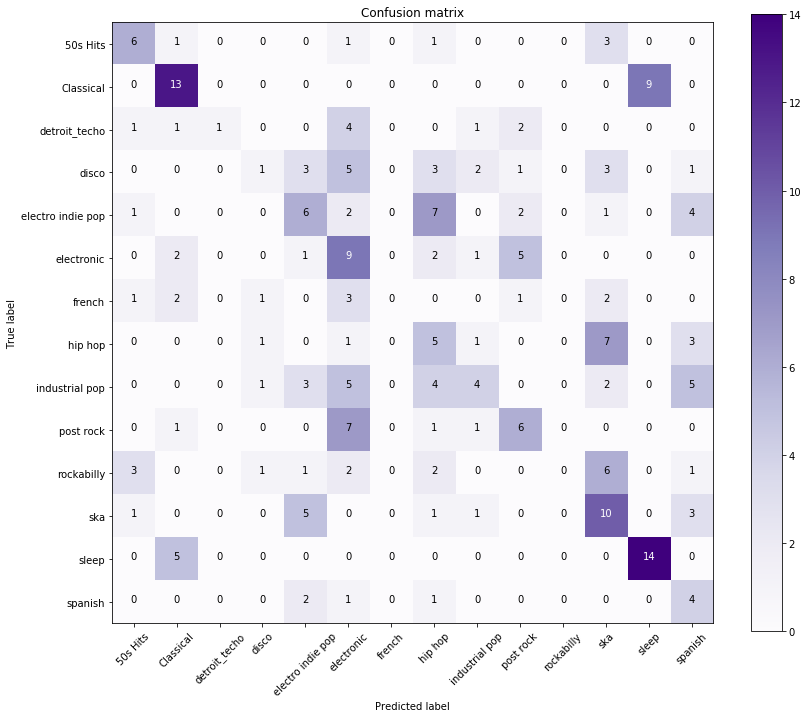

In [142]:
plot_confusion_matrix(SVC_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [143]:
filename = './models/SVC_model_1.sav'
pickle.dump(svclassifier, open(filename, 'wb'))

### Second SVC Model

In [144]:
tic = time()
svclassifier = SVC(kernel='linear', C=10)  
svclassifier.fit(X_train, y_train) 
preds = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.43593788146972656 seconds


In [145]:
SVC_score = svclassifier.score(X_test, y_test)
SVC_score

0.5672268907563025

In [146]:
print_metrics(y_test, preds)

Precision Score: 0.5719284529937027
Recall Score: 0.5672268907563025
Accuracy Score: 0.5672268907563025
F1 Score: 0.5576527101938331


In [147]:
SVC_confusion_matrix = confusion_matrix(y_test,preds)
SVC_classification_report = classification_report(y_test,preds)
print(SVC_confusion_matrix)
print(SVC_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[ 9  0  0  0  0  0  1  1  0  0  1  0  0  0]
 [ 0 16  0  0  0  0  1  0  0  0  0  0  5  0]
 [ 0  0  7  2  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1 12  2  1  0  1  0  0  0  2  0  0]
 [ 0  0  0  0 16  0  1  1  1  0  0  2  0  2]
 [ 0  1  2  0  1  8  0  1  1  6  0  0  0  0]
 [ 2  1  0  0  0  0  4  0  1  0  2  0  0  0]
 [ 1  0  0  0  2  0  0  9  3  0  0  3  0  0]
 [ 0  0  1  1  7  1  0  0 12  0  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0 11  0  0  0  0]
 [ 3  0  0  2  2  0  0  0  2  0  3  4  0  0]
 [ 1  0  0  3  2  0  1  0  3  0  0 11  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  2  0  3]]
                   precision    recall  f1-score   support

         50s Hits       0.56      0.75      0.64        12
        classical       0.64      0.73      0.68        22
    detroit_techo       0.64      0.70      0.67        10
            disco       0.57      0.63      0.60        19
electro indie pop       0.48      0.70      0.57        23
       electro

In [148]:
svc_results = list(zip(list(preds), list(y_test)))
svc_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('ska', 'spanish'),
 ('ska', 'industrial pop'),
 ('ska', 'disco'),
 ('french', 'classical'),
 ('disco', 'disco'),
 ('classical', 'sleep'),
 ('classical', 'post rock'),
 ('electro indie pop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('electro indie pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('industrial pop', 'industrial pop'),
 ('disco', 'disco'),
 ('electro indie pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('french', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('electro indie pop', 'electr

Confusion Matrix, without normalization
[[ 9  0  0  0  0  0  1  1  0  0  1  0  0  0]
 [ 0 16  0  0  0  0  1  0  0  0  0  0  5  0]
 [ 0  0  7  2  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1 12  2  1  0  1  0  0  0  2  0  0]
 [ 0  0  0  0 16  0  1  1  1  0  0  2  0  2]
 [ 0  1  2  0  1  8  0  1  1  6  0  0  0  0]
 [ 2  1  0  0  0  0  4  0  1  0  2  0  0  0]
 [ 1  0  0  0  2  0  0  9  3  0  0  3  0  0]
 [ 0  0  1  1  7  1  0  0 12  0  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0 11  0  0  0  0]
 [ 3  0  0  2  2  0  0  0  2  0  3  4  0  0]
 [ 1  0  0  3  2  0  1  0  3  0  0 11  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  2  0  3]]


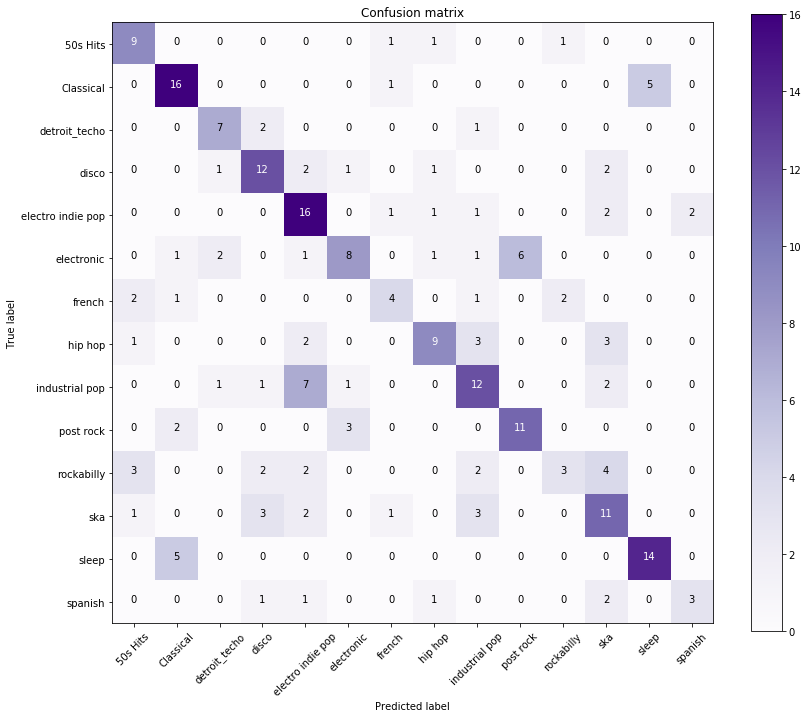

In [149]:
plot_confusion_matrix(SVC_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [150]:
filename = './models/SVC_model_2.sav'
pickle.dump(svclassifier, open(filename, 'wb'))